In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

import numpy as np
from numpy import random as rand
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, seed
import sklearn as skl
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

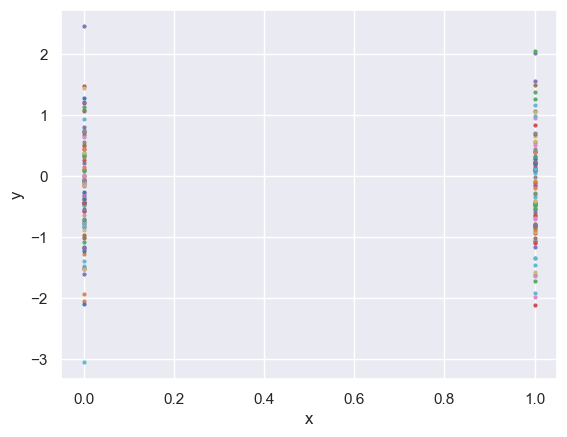

In [34]:
n = 2         # n number of independent 1-D gaussian 
m= 100       # m points in 1-D gaussian  
f_random = np.random.normal(size=(n, m))

Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

plt.clf()
plt.plot(Xshow, f_random, 'o', linewidth=1, markersize=1, markeredgewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

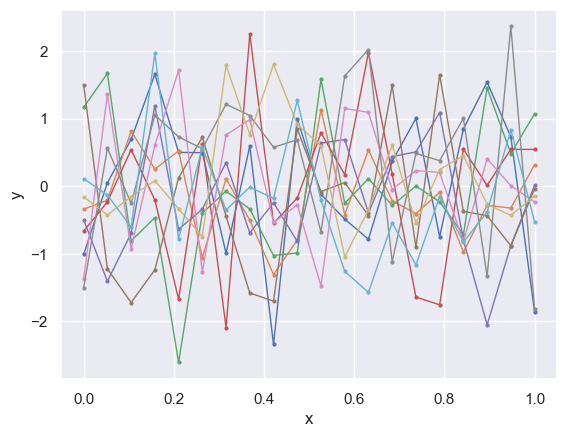

In [8]:
n = 20         # n number of independent 1-D gaussian 
m= 10        # m points in 1-D gaussian  
f_random = np.random.normal(size=(n, m))

Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

plt.clf()
plt.plot(Xshow, f_random, '-o', linewidth=1, markersize=1, markeredgewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

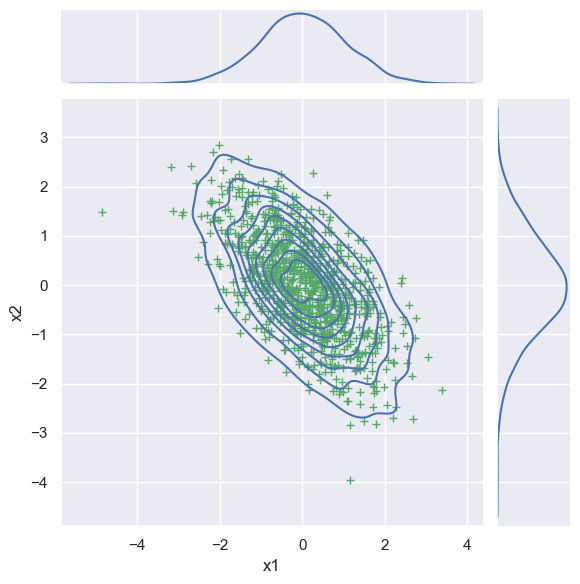

In [14]:

mean, cov = [0., 0.], [(1., -0.6), (-0.6, 1.)]
data = np.random.multivariate_normal(mean, cov, 1000)
df = pd.DataFrame(data, columns=["x1", "x2"])
g = sns.jointplot(x='x1', y='x2', data=df, kind="kde")

g.plot_joint(plt.scatter, c="g", s=30, linewidth=1, marker="+")

g.set_axis_labels('x1', 'x2')
plt.show()

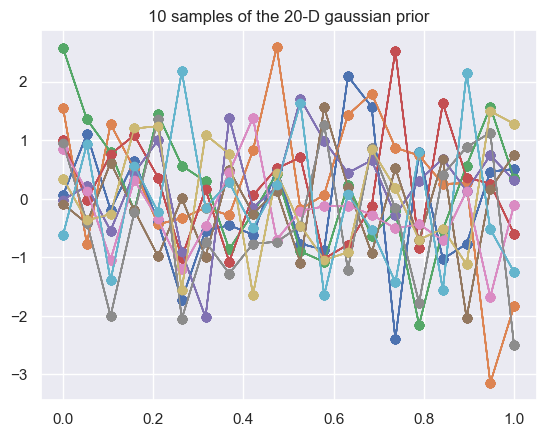

In [15]:
n = 20 
m = 10

mean = np.zeros(n)
cov = np.eye(n)

f_prior = np.random.multivariate_normal(mean, cov, m).T

plt.clf()

#plt.plot(Xshow, f_prior, '-o')
Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

for i in range(m):
    plt.plot(Xshow, f_prior, '-o', linewidth=1)
    
plt.title('10 samples of the 20-D gaussian prior')
plt.show()

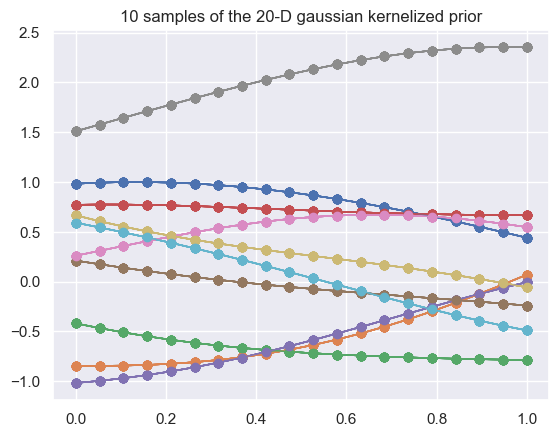

In [16]:
# Define the kernel
def kernel(a, b):
    sqdist = np.sum(a**2,axis=1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    # np.sum( ,axis=1) means adding all elements columnly; .reshap(-1, 1) add one dimension to make (n,) become (n,1)
    return np.exp(-.5 * sqdist)

n = 20  
m = 10

Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

K_ = kernel(Xshow, Xshow)                  # k(x_star, x_star)        

mean = np.zeros(n)
cov = np.eye(n)

f_prior = np.random.multivariate_normal(mean, K_, m).T

plt.clf()

Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

for i in range(m):
    plt.plot(Xshow, f_prior, '-o', linewidth=1)
    
plt.title('10 samples of the 20-D gaussian kernelized prior')
plt.show()

<Figure size 640x480 with 0 Axes>

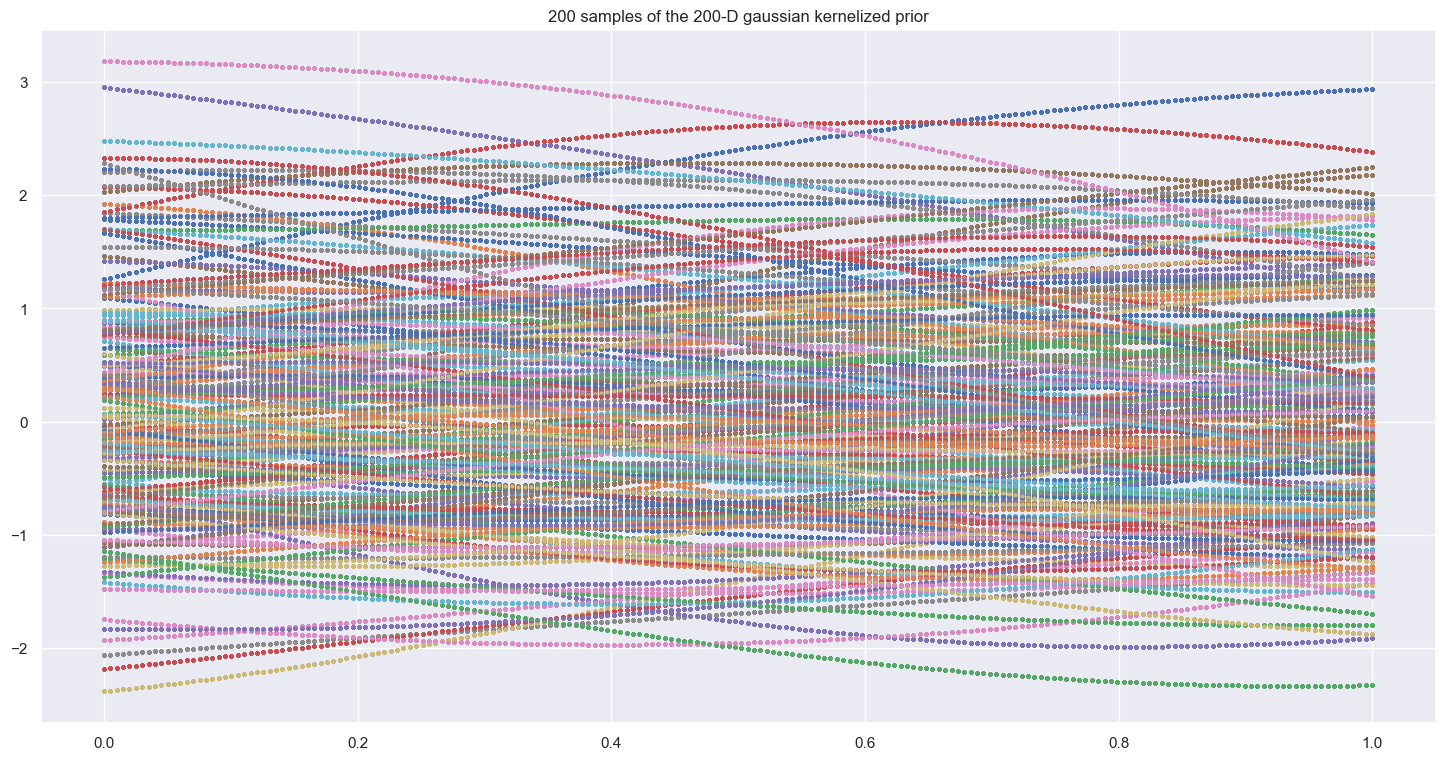

In [17]:
n = 200         
m = 200

Xshow = np.linspace(0, 1, n).reshape(-1,1)   

K_ = kernel(Xshow, Xshow)                    # k(x_star, x_star)        

mean = np.zeros(n)
cov = np.eye(n)

f_prior = np.random.multivariate_normal(mean, K_, m).T

plt.clf()
#plt.plot(Xshow, f_prior, '-o')
Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

plt.figure(figsize=(18,9))
for i in range(m):
    plt.plot(Xshow, f_prior, 'o', linewidth=1, markersize=2, markeredgewidth=1)
    
plt.title('200 samples of the 200-D gaussian kernelized prior')
#plt.axis([0, 1, -3, 3])
plt.show()
#plt.savefig('priorT.png', bbox_inches='tight', dpi=300)

In [29]:
# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()
#f = lambda x: (0.25*(x**2)).flatten()
x = np.arange(-5, 5, 0.1)


In [30]:
# Define the kernel
def kernel(a, b):
    kernelParameter_l = 0.1
    kernelParameter_sigma = 1.0
    sqdist = np.sum(a**2,axis=1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    # np.sum( ,axis=1) means adding all elements columnly; .reshap(-1, 1) add one dimension to make (n,) become (n,1)
    return kernelParameter_sigma*np.exp(-.5 * (1/kernelParameter_l) * sqdist)

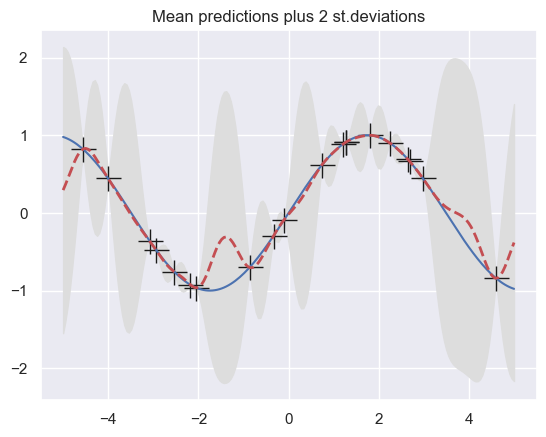

In [31]:
# Sample some input points and noisy versions of the function evaluated at
# these points. 
N = 20         # number of existing observation points (training points).
n = 200        # number of test points.
s = 0.00005    # noise variance.

X = np.random.uniform(-5, 5, size=(N,1))     # N training points 
y = f(X) + s*np.random.randn(N)

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))     # line 1 

# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))   # k_star = kernel(X, Xtest), calculating v := l\k_star
mu = np.dot(Lk.T, np.linalg.solve(L, y))    # \alpha = np.linalg.solve(L, y) 

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)                  # k(x_star, x_star)        
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)   
s = np.sqrt(s2)

# PLOTS:
plt.figure(1)
plt.clf()
plt.plot(X, y, 'k+', ms=18)
plt.plot(Xtest, f(Xtest), 'b-')
plt.gca().fill_between(Xtest.flat, mu-2*s, mu+2*s, color="#dddddd")
plt.plot(Xtest, mu, 'r--', lw=2)
#plt.savefig('predictive.png', bbox_inches='tight', dpi=300)
plt.title('Mean predictions plus 2 st.deviations')
plt.show()
#plt.axis([-5, 5, -3, 3])

<Figure size 640x480 with 0 Axes>

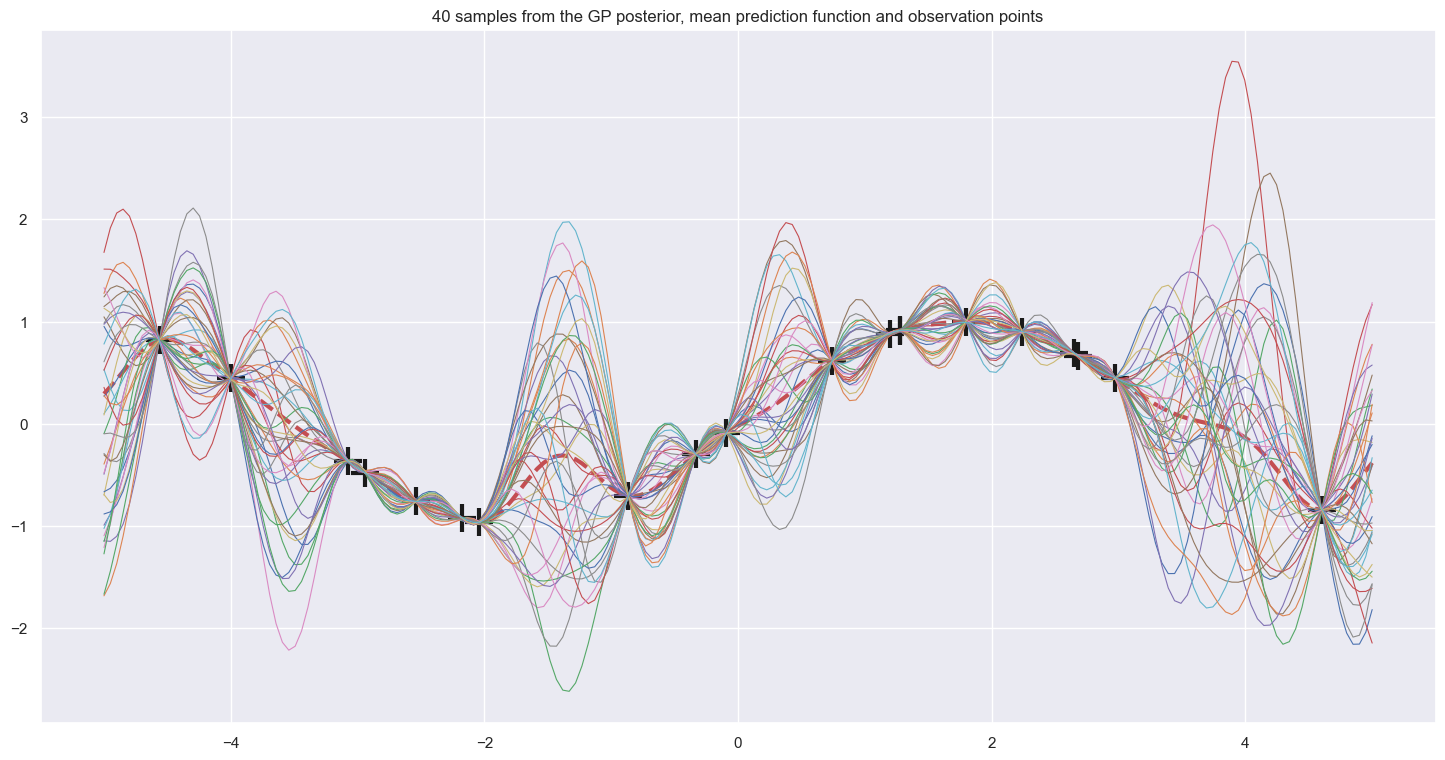

In [32]:
# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,40)))  # size=(n, m), m shown how many posterior  
plt.figure(3)
plt.clf()
plt.figure(figsize=(18,9))
plt.plot(X, y, 'k+', markersize=20, markeredgewidth=3)
plt.plot(Xtest, mu, 'r--', linewidth=3)
plt.plot(Xtest, f_post, linewidth=0.8)
plt.title('40 samples from the GP posterior, mean prediction function and observation points')
plt.show()
#plt.axis([-5, 5, -3, 3])
#plt.savefig('post.png', bbox_inches='tight', dpi=600)